# Compare SNR between kLatestCalib and calibration without bug fix

### Apr 25, 2021

## Code

In [1]:
import sys
import csv
# sys.path.insert(0,"/users/PCON0003/cond0068/.local/lib/python3.7/")
sys.path.append("/users/PAS0654/osu8354/ARA_cvmfs/root_build/lib/") # go to parent dir
sys.path.append("/users/PCON0003/cond0068/.local/lib/python3.7/site-packages/")
# sys.path.append("/users/PCON0003/cond0068/pyrex_sims/fromBen/thesis_work/pyrex-custom/analysis/custom/analysis/")
import ROOT
import math
import numpy as np
from ROOT import TH1D,TF1, gRandom, gPad, gStyle
import matplotlib as mpl
import matplotlib.pyplot as plt
from ROOT import TChain, TSelector, TTree
import os
import matplotlib.colors as mcolors
import scipy
from matplotlib.colors import LogNorm
import pandas as pd
import seaborn as sns
%matplotlib inline
# sys.path.insert(1, "/users/PAS0654/osu8354/ARA_cvmfs/source/AraRoot/analysis/ARA_analysis/SourceSearch")
# import deDisperse_util as util
import matplotlib.colors as colors

my_path_plots = os.path.abspath("./plots/")
import re


Welcome to JupyROOT 6.18/04


In [2]:
# mpl.use('agg') 
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.unicode'] = True
mpl.rcParams['mathtext.rm'] = 'Times New Roman'
mpl.rcParams['mathtext.it'] = 'Times New Roman:italic'
mpl.rcParams['mathtext.bf'] = 'Times New Roman:bold'

mpl.rc('font', family='serif', size=12)
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['ytick.major.size'] = 5

mpl.rcParams['axes.titlesize'] = 18
mpl.rcParams['axes.labelsize'] = 18
# mpl.rc('font', size=16)
mpl.rc('axes', titlesize=20)

current_palette = sns.color_palette('colorblind', 10)
import warnings
warnings.filterwarnings("ignore")


# Get data

In [3]:
data = pd.read_pickle("/users/PAS0654/osu8354/ARA_cvmfs/source/AraRoot/analysis/ARA_analysis/ARA_SourceSearch/data_util/SNR_perChannel_run2381_no_bug.pkl")
SNRArr = []#[[] for i in range(16)]
for row in data.itertuples():
    SNRArr.append(row.SNR)
chNames = ["SNR_ch%i"%i for i in range(16) ]
SNR_pd = pd.DataFrame(SNRArr, columns = chNames)
data.drop(columns=["SNR"], inplace=True)
SNR_run_Nobug = data.join(SNR_pd)
SNR_run_Nobug.tail()

,EvNum,isCalPulser,SNR_ch0,SNR_ch1,SNR_ch2,SNR_ch3,SNR_ch4,SNR_ch5,SNR_ch6,SNR_ch7,SNR_ch8,SNR_ch9,SNR_ch10,SNR_ch11,SNR_ch12,SNR_ch13,SNR_ch14,SNR_ch15
12069,141534,False,3.892937,3.638197,3.005328,4.171882,3.550434,3.369697,3.721356,3.717358,3.856645,3.889312,3.859618,4.327081,3.841726,3.256916,3.405656,4.611520
12070,141539,False,3.730357,3.285025,3.694671,3.115336,3.797854,2.875234,3.347354,3.872392,3.862644,3.281223,3.969208,4.140073,3.437731,2.922731,3.179082,2.995789
12071,141558,False,4.028491,4.488745,3.706485,4.528749,4.031023,3.311116,3.549827,3.224528,2.949470,3.373191,3.290801,3.755559,3.574743,3.279429,3.304534,2.537062
12072,141576,False,4.053179,3.291196,4.051547,3.506668,4.745304,3.457610,3.364786,4.561605,4.950902,3.479230,3.402606,3.997946,4.179950,3.680158,4.129583,4.441778
12073,141589,False,3.451560,3.412056,3.517983,3.410280,3.644605,4.588292,3.633542,3.149234,2.896718,4.192953,3.794158,3.468577,3.479778,3.843036,3.108846,5.010276


In [4]:
data = pd.read_pickle("/users/PAS0654/osu8354/ARA_cvmfs/source/AraRoot/analysis/ARA_analysis/ARA_SourceSearch/data_util/SNR_perChannel_run2381_bug.pkl")
SNRArr = []#[[] for i in range(16)]
for row in data.itertuples():
    SNRArr.append(row.SNR)
chNames = ["SNR_ch%i"%i for i in range(16) ]
SNR_pd = pd.DataFrame(SNRArr, columns = chNames)
data.drop(columns=["SNR"], inplace=True)
SNR_run_bug = data.join(SNR_pd)
SNR_run_bug.tail()

,EvNum,isCalPulser,SNR_ch0,SNR_ch1,SNR_ch2,SNR_ch3,SNR_ch4,SNR_ch5,SNR_ch6,SNR_ch7,SNR_ch8,SNR_ch9,SNR_ch10,SNR_ch11,SNR_ch12,SNR_ch13,SNR_ch14,SNR_ch15
12069,141534,False,3.786538,2.091254,2.978893,3.846118,4.661210,3.298245,3.763400,4.278496,4.645271,3.063608,4.676191,3.641119,3.493570,2.081392,3.701919,7.427439
12070,141539,False,3.459462,2.759358,4.401036,3.023065,4.565477,3.067713,3.596945,4.041056,4.242265,3.530965,4.514908,3.537905,3.770406,2.411614,3.101327,5.129247
12071,141558,False,3.410836,2.812618,4.192971,2.830092,5.206588,4.055176,3.571061,3.413001,3.540499,4.282931,2.991515,2.680664,3.077077,2.616324,4.054414,2.823868
12072,141576,False,3.330933,2.478634,4.711667,3.038138,6.868226,3.886961,3.328590,3.533245,6.501140,3.217615,3.645727,3.493471,4.562153,2.664257,3.622007,5.711914
12073,141589,False,3.383845,2.205744,3.219733,3.350958,5.359854,4.756575,3.708928,3.132595,3.698509,5.065875,3.287606,5.171211,3.457551,2.281652,3.342245,8.430839


(array([ 13.,  88., 266., 457., 529., 423., 270.,  91.,  16.,   3.]),
 array([16.31536882, 17.07387534, 17.83238186, 18.59088838, 19.34939489,
        20.10790141, 20.86640793, 21.62491445, 22.38342096, 23.14192748,
        23.900434  ]),
 <a list of 10 Patch objects>)

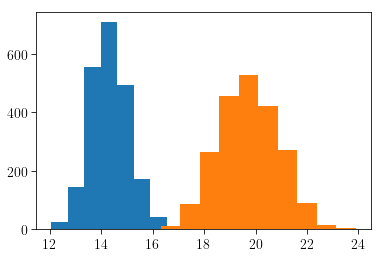

In [12]:
plt.hist(SNR_run_Nobug.loc[SNR_run_Nobug.isCalPulser==True].SNR_ch2)
plt.hist(SNR_run_bug.loc[SNR_run_bug.isCalPulser==True].SNR_ch2)

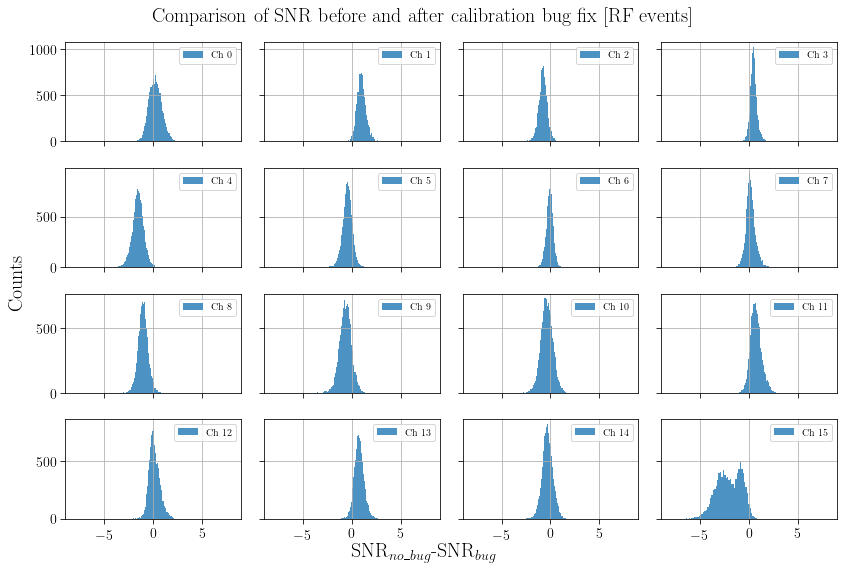

In [8]:
fig, ax = plt.subplots(4, 4, sharex='col', sharey='row', figsize=(12,8))
axs = ax.ravel()

ch = 0
for ch in range(0,16):
    SNR_Nobug = SNR_run_Nobug.loc[SNR_run_Nobug.isCalPulser==False]["SNR_ch%i"%ch]
    SNR_bug = SNR_bug = SNR_run_bug.loc[SNR_run_bug.isCalPulser==False]["SNR_ch%i"%ch]

    axs[ch].hist(SNR_Nobug-SNR_bug, alpha = 0.8, label = "Ch %i"%(ch), bins = 50)
    ch+=1
for ax in axs:
    ax.set_xlim(-9,9)
#     ax.set_ylim(0,25)
    ax.set(xlabel="", ylabel = "")
    ax.grid()

    ax.legend(loc="upper right", fontsize=10)

fig.text(0.5, 0.03, 'SNR$_{no\_bug}$-SNR$_{bug}$', ha='center', va='center', fontsize=20) 
fig.text(0.03, 0.5, 'Counts', ha='center', va='center', rotation='vertical', fontsize=20)
plt.suptitle("Comparison of SNR before and after calibration bug fix [RF events]", fontsize=20)
plt.tight_layout(rect=[0.03, 0.03, 1, 0.95])
plt.savefig('SNR_comparisonBeforeAfter_CalibBugFix_RF.png', dpi=250)

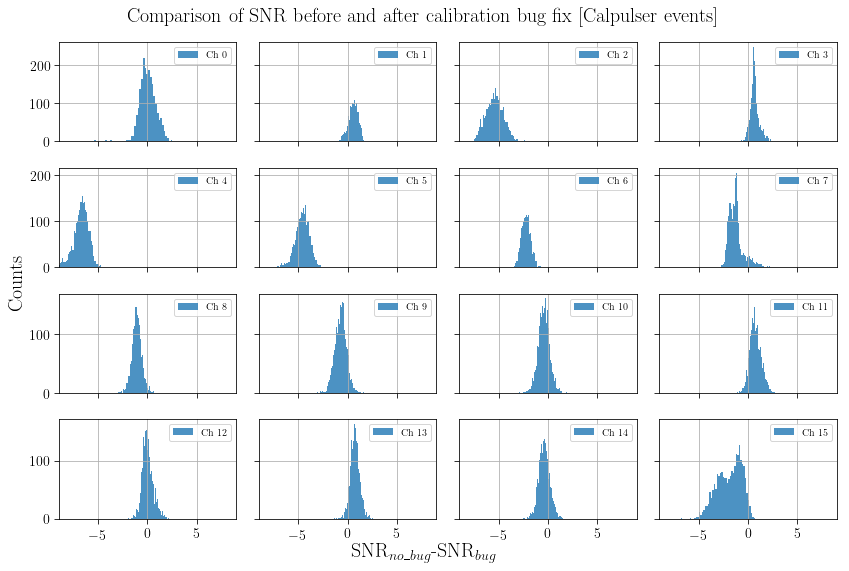

In [9]:
fig, ax = plt.subplots(4, 4, sharex='col', sharey='row', figsize=(12,8))
axs = ax.ravel()

ch = 0
for ch in range(0,16):
    SNR_Nobug = SNR_run_Nobug.loc[SNR_run_Nobug.isCalPulser==True]["SNR_ch%i"%ch]
    SNR_bug = SNR_bug = SNR_run_bug.loc[SNR_run_bug.isCalPulser==True]["SNR_ch%i"%ch]

    axs[ch].hist(SNR_Nobug-SNR_bug, alpha = 0.8, label = "Ch %i"%(ch), bins = 50)
    ch+=1
for ax in axs:
    ax.set_xlim(-9,9)
#     ax.set_ylim(0,25)
    ax.set(xlabel="", ylabel = "")
    ax.grid()

    ax.legend(loc="upper right", fontsize=10)

fig.text(0.5, 0.03, 'SNR$_{no\_bug}$-SNR$_{bug}$', ha='center', va='center', fontsize=20) 
fig.text(0.03, 0.5, 'Counts', ha='center', va='center', rotation='vertical', fontsize=20)
plt.suptitle("Comparison of SNR before and after calibration bug fix [Calpulser events]", fontsize=20)
plt.tight_layout(rect=[0.03, 0.03, 1, 0.95])
plt.savefig('SNR_comparisonBeforeAfter_CalibBugFix_calpulsers.png', dpi=250)